# From consumer–resource dynamics to logistic growth

This section shows how a mechanistic **consumer–resource model** (the MiCRM) can be approximated as a **generalized Lotka–Volterra (gLV)** model, and—when we keep only one population—into **logistic growth**.

- MiCRM-style consumer–resource models are widely used in microbial ecology ({cite:p}`marsland2019available`; see also {cite:p}`goldford2018emergent`).
- Logistic growth is a classical single‑population model dating back to Verhulst ({cite:p}`verhulst1838notice`).

## What you will learn

- How the **gLV interaction coefficients** arise from resource depletion (and, optionally, cross‑feeding).
- Why the gLV approximation is **local** (valid near an equilibrium).
- Why a one‑species gLV often becomes **logistic growth** (negative density dependence).

## Where this fits in the course

If you want more background as you read this notebook:
- Logistic growth, equilibria, and stability: [populations](populations)
- Interactions and multi‑species dynamics: [interactions](interactions)
- Microbial growth and chemostat ideas: [microbial-growth](microbial-growth)
- Maths details (linearization, Jacobians): [appendix-maths](appendix-maths)

---

## Model (MiCRM)

We write consumer abundance/biomass as $C_i(t)$ and resource concentrations as $R_\alpha(t)$.

The standard MiCRM is

$$
\frac{dC_i}{dt} \,=\, C_i\left[\sum_{\alpha=1}^{M} R_\alpha\,u_{i\alpha}\,(1-\lambda_\alpha)\; -\; m_i\right],
$$

$$
\frac{dR_\alpha}{dt} \,=\, \rho_\alpha - \omega_\alpha R_\alpha \, -\,\sum_{i=1}^{N} C_i R_\alpha u_{i\alpha}
\; +\;\sum_{i=1}^{N}\sum_{\beta=1}^{M} C_i R_\beta u_{i\beta}\,l_{\beta\alpha}.
$$

**Interpretation (one clean way to read the symbols):**
- $u_{i\alpha}$: uptake coefficient (a **Type‑I / linear** uptake assumption in $R_\alpha$).
- $\lambda_\alpha = \sum_\beta l_{\alpha\beta}$: total leakage fraction of consumed resource $\alpha$.
- $\rho_\alpha$: resource supply term; $\omega_\alpha$: resource washout/decay.
- $m_i$: maintenance (and may also include consumer washout).
- $l_{\beta\alpha}$: byproduct conversion matrix (cross‑feeding).

**Roadmap:**
1. Use a **quasi‑steady resource** approximation (time‑scale separation) to write $R_\alpha \approx \hat R_\alpha(C)$.
2. **Linearize near an equilibrium** to obtain a gLV model.
3. Specialize to $N=1$ to see the gLV becomes **logistic growth** under very general conditions.

---

## Reminder: gLV form

$$
\frac{dC_i}{dt} \,=\, C_i\left(r_i + \sum_{j=1}^N a_{ij}C_j\right).
$$

For $N=1$: $\dot C = C(r + a_{11}C)$, which is logistic when $a_{11}<0$:

$$
\frac{dC}{dt}= rC - aC^2 = rC\left(1-\frac{C}{K}\right),\qquad a=-a_{11}>0,\quad K=\frac{r}{a}.
$$


## 1) Effective gLV derivation from MiCRM (QSS + linearization)

The key idea is: **resources mediate interactions**. If resources adjust quickly, we can eliminate them and get an approximate population‑only model.

> The result is a **local** approximation: we linearize near a particular equilibrium, so the gLV coefficients are not “universal constants” for all states.

### 1.1 Quasi‑steady resources (time‑scale separation)

Assume resources relax quickly compared to consumers, so (approximately)

$$
\frac{dR_\alpha}{dt}\approx 0.
$$

Define the resource nullcline equations

$$
F_\alpha(C,R)= \rho_\alpha - \omega_\alpha R_\alpha - \sum_i C_iR_\alpha u_{i\alpha}
+ \sum_i\sum_\beta C_iR_\beta u_{i\beta}l_{\beta\alpha}=0.
$$

Solving $F_\alpha=0$ (implicitly) gives functions $R_\alpha=\hat R_\alpha(C)$.

Substitute this into the consumer dynamics:

$$
\frac{dC_i}{dt}=C_i\Big[\sum_\alpha \hat R_\alpha(C)\,u_{i\alpha}(1-\lambda_\alpha) - m_i\Big]
=:C_i\,G_i(C).
$$

### 1.2 Linearize around an equilibrium

Let $(\hat C,\hat R)$ be an equilibrium with $\hat C_i>0$ for retained species; then $G_i(\hat C)=0$.

First‑order (Taylor) expansion of the resource nullclines around $\hat C$:

$$
\hat R_\alpha(C)\approx \hat R_\alpha+\sum_j \frac{\partial \hat R_\alpha}{\partial C_j}\Big|_{\hat C}(C_j-\hat C_j).
$$

Insert this into $G_i$ and collect terms to obtain a gLV model:

$$
\frac{dC_i}{dt}\approx C_i\left(r_i+\sum_j a_{ij}C_j\right),
$$

with

$$
a_{ij}=\sum_\alpha u_{i\alpha}(1-\lambda_\alpha)\frac{\partial \hat R_\alpha}{\partial C_j}\Big|_{\hat C},
\qquad
r_i=\left[\sum_\alpha u_{i\alpha}(1-\lambda_\alpha)\hat R_\alpha - m_i\right]-\sum_j a_{ij}\hat C_j.
$$

**Interpretation:**
- $a_{ij}$ encodes how changing $C_j$ shifts equilibrium resources, which then changes $C_i$’s growth rate.
- If more consumers reduce resources ($\partial \hat R_\alpha/\partial C_j<0$), you get **competition** (negative contributions to $a_{ij}$).
- With leakage/cross‑feeding, some derivatives can be positive, creating **facilitation**.

### 1.3 Computing $\partial \hat R/\partial C$ (Implicit Function Theorem)

Differentiate $F_\alpha(C,\hat R(C))=0$ with respect to $C_j$:

$$
\frac{\partial F_\alpha}{\partial C_j}+\sum_\gamma \frac{\partial F_\alpha}{\partial R_\gamma}\frac{\partial \hat R_\gamma}{\partial C_j}=0.
$$

Let $D_{\alpha\gamma}=\partial F_\alpha/\partial R_\gamma$ evaluated at $(\hat C,\hat R)$. Then

$$
\frac{\partial \hat R}{\partial C_j}=-D^{-1}\frac{\partial F}{\partial C_j}.
$$

If you want a refresher on this linear‑algebra/Jacobian view, see [appendix-maths](appendix-maths).


## 2) Special case: one species ⇒ logistic growth (effective $r$ and $a_{11}$)

Now set $N=1$ and drop species indices: biomass $C(t)$, preferences $u_\alpha$, maintenance $m$.

This is the cleanest setting to see *why* logistic growth is such a common coarse‑grained approximation: if increasing $C$ tends to reduce the resources the population relies on, you automatically get negative density dependence.

### 2.1 Logistic form

The one‑species gLV approximation is

$$
\frac{dC}{dt}\approx C\left(r+a_{11}C\right).
$$

If $a_{11}<0$, this is logistic: $\dot C=rC-aC^2$ with $a=-a_{11}>0$ and $K=r/a$.

(For more on interpreting equilibria/stability in 1D models, see [populations](populations).)

### 2.2 General mapping from MiCRM

From the gLV derivation,

$$
a_{11}=\sum_{\alpha=1}^M u_{\alpha}(1-\lambda_\alpha)\,\frac{\partial \hat R_\alpha}{\partial C}\Big|_{\hat C},
\qquad
r=\left[\sum_\alpha u_\alpha(1-\lambda_\alpha)\hat R_\alpha(\hat C)-m\right]-a_{11}\hat C.
$$

So self‑limitation is expected whenever the dominant resources satisfy $\partial \hat R_\alpha/\partial C<0$.

### 2.3 Closed-form example (no leakage)

If $l_{\beta\alpha}=0$ (hence $\lambda_\alpha=0$), resource QSS gives

$$
0=\rho_\alpha-\omega_\alpha R_\alpha-CR_\alpha u_\alpha
\Rightarrow
\hat R_\alpha(C)=\frac{\rho_\alpha}{\omega_\alpha+Cu_\alpha}.
$$

Then

$$
\frac{\partial \hat R_\alpha}{\partial C}=-\frac{\rho_\alpha u_\alpha}{(\omega_\alpha+Cu_\alpha)^2},
$$

and therefore

$$
a_{11}(\hat C)=\sum_\alpha u_\alpha\frac{\partial \hat R_\alpha}{\partial C}\Big|_{\hat C}
=-\sum_\alpha \frac{\rho_\alpha u_\alpha^2}{(\omega_\alpha+\hat Cu_\alpha)^2}<0.
$$

So, in this simple no‑leakage case, the MiCRM *guarantees* negative density dependence for one population.


## 3) Numerical simulations

Here we simulate a one‑species MiCRM with **two resources** and compare it to a fitted/predicted logistic curve.

We’ll do this in two “environments”:
- **Batch**: no inflow/outflow ($D=0$). Resources are depleted.
- **Chemostat**: constant dilution $D>0$ with feed concentrations $S$ (a standard continuous‑culture setup; see {cite:p}`novickszilard1950chemostat`).

Workflow:
1. Define MiCRM ODEs and integrate with `scipy.integrate.solve_ivp`.
2. Compute effective $(r,a)$ from the mapping above (exact for some linear cases; approximate for Monod).
3. Compare time series for $C(t)$ or $N(t)$.

If you need a quick refresher on using SciPy ODE solvers and plotting, see [python](python) and [microbial-growth](microbial-growth).


### 3.1 Warm‑up simulation: linear uptake with supply + washout

First we simulate a minimal one‑species, multi‑resource model with **linear uptake** proportional to $CR_\alpha u_\alpha$ and a simple supply/washout term for resources.

This is the same *mathematical structure* as the no‑leakage example above, and it lets us check the mapping to logistic growth in a controlled setting.

We assume $\rho_\alpha>0$ and $\omega_\alpha>0$ so that resources have a well‑defined “resource‑only” equilibrium $R_\alpha=\rho_\alpha/\omega_\alpha$ in the absence of consumers.

For no leakage:

$$
\hat R_\alpha(C)=\frac{\rho_\alpha}{\omega_\alpha + C u_\alpha},\qquad
\frac{\partial \hat R_\alpha}{\partial C}=-\frac{\rho_\alpha u_\alpha}{(\omega_\alpha + C u_\alpha)^2}.
$$

In the code below we:
- integrate the full $(C, R_1, R_2)$ system;
- estimate the equilibrium $\hat C$ numerically;
- plug $\hat C$ into the analytic formulas to get an effective $(r, a_{11})$;
- compare $C(t)$ to the corresponding logistic trajectory.


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def micrm_supply_washout_rhs(t, y, rho, omega, u, m):
    """Single-species, no-leakage MiCRM with linear uptake and resource supply/washout.

    dC/dt = C( sum_alpha R_alpha u_alpha - m )
    dR_alpha/dt = rho_alpha - omega_alpha R_alpha - C R_alpha u_alpha
    """
    C = y[0]
    R = y[1:]
    dC = C * (np.sum(R * u) - m)
    dR = rho - omega * R - C * R * u
    return np.concatenate([[dC], dR])


def simulate_supply_washout_micrm(C0, R0, rho, omega, u, m, tmax=200, npts=4000):
    y0 = np.concatenate([[C0], R0])
    t_eval = np.linspace(0, tmax, npts)
    sol = solve_ivp(
        lambda t, y: micrm_supply_washout_rhs(t, y, rho, omega, u, m),
        (0, tmax),
        y0,
        t_eval=t_eval,
        rtol=1e-9,
        atol=1e-12,
    )
    return sol.t, sol.y


# Parameters (2 resources)
rho = np.array([1.0, 0.6])      # supply
omega = np.array([0.4, 0.3])    # resource washout/decay
u = np.array([0.8, 0.5])        # preferences
m = 0.2                         # maintenance (include consumer washout here if desired)

C0 = 0.05
R0 = rho / omega                # resource-only equilibrium (no consumers)

t, y = simulate_supply_washout_micrm(C0, R0, rho, omega, u, m, tmax=200)
C = y[0]
R = y[1:]

# Numerical equilibrium (late-time mean)
Chat = float(np.mean(C[-400:]))
Rhat_num = np.mean(R[:, -400:], axis=1)


# Closed-form nullcline and derivative (no leakage)
def Rhat_of_C(Cval):
    return rho / (omega + Cval * u)


def dRhat_dC(Cval):
    return -rho * u / (omega + Cval * u) ** 2


a11 = np.sum(u * dRhat_dC(Chat))
r_eff = (np.sum(u * Rhat_of_C(Chat)) - m) - a11 * Chat


# Logistic comparison (gLV with one species)
def simulate_logistic_scalar(C0, r, a, tmax=200, npts=4000):
    t_eval = np.linspace(0, tmax, npts)
    sol = solve_ivp(
        lambda t, y: [r * y[0] + a * y[0] ** 2],
        (0, tmax),
        [C0],
        t_eval=t_eval,
        rtol=1e-10,
        atol=1e-12,
    )
    return sol.t, sol.y[0]


tL, Clog = simulate_logistic_scalar(C0, r_eff, a11, tmax=200)

(a11, r_eff, r_eff / (-a11) if a11 < 0 else np.nan, Chat, Rhat_num)


(np.float64(-0.025000909765940202),
 np.float64(0.18657659053018824),
 np.float64(7.462792045446659),
 7.462792045422807,
 array([0.15698011, 0.14883182]))

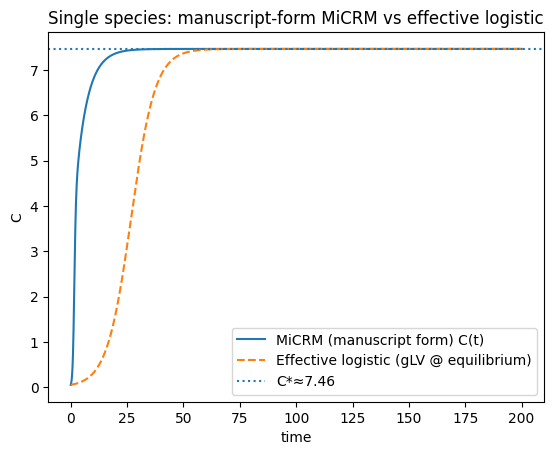

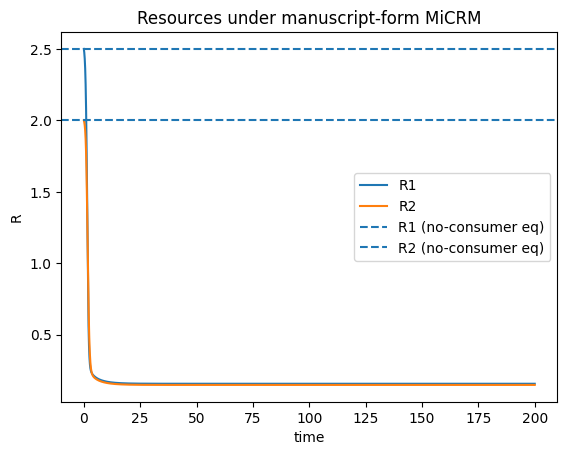

In [ ]:
plt.figure()
plt.plot(t, C, label="MiCRM C(t) (linear uptake, supply/washout)")
plt.plot(tL, Clog, "--", label="Effective logistic (gLV near equilibrium)")
plt.axhline(Chat, linestyle=":", label=f"C*≈{Chat:.3g}")
plt.xlabel("time")
plt.ylabel("C")
plt.legend()
plt.title("Single species: MiCRM vs effective logistic")
plt.show()

plt.figure()
for k in range(R.shape[0]):
    plt.plot(t, R[k], label=f"R{k+1}")
plt.axhline((rho / omega)[0], linestyle="--", label="R1 (no-consumer eq)")
plt.axhline((rho / omega)[1], linestyle="--", label="R2 (no-consumer eq)")
plt.xlabel("time")
plt.ylabel("R")
plt.legend()
plt.title("Resources (linear uptake, supply/washout)")
plt.show()


In [3]:

import numpy as np
from dataclasses import dataclass
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

@dataclass
class Params:
    M: int
    eta: np.ndarray          # yields (M,)
    lam: np.ndarray          # max uptake or linear coefficient (M,)
    Km: np.ndarray           # Monod half-sat (M,)
    D: float                 # dilution rate (0 for batch)
    S: np.ndarray            # feed concentrations (M,) (ignored if batch)
    use_monod: bool = True

def uptake(R: np.ndarray, p: Params) -> np.ndarray:
    if p.use_monod:
        return p.lam * (R / (p.Km + R))
    else:
        return p.lam * R

def micrm_rhs(t: float, y: np.ndarray, p: Params) -> np.ndarray:
    N = y[0]
    R = y[1:]
    u = uptake(R, p)
    dN = N * np.sum(p.eta * u) - p.D * N
    dR = p.D * (p.S - R) - u * N
    return np.concatenate([[dN], dR])

def simulate(p: Params, N0: float, R0: np.ndarray, tmax: float=80, npts: int=2000):
    y0 = np.concatenate([[N0], R0])
    t_eval = np.linspace(0, tmax, npts)
    sol = solve_ivp(lambda t, y: micrm_rhs(t, y, p), (0, tmax), y0,
                    t_eval=t_eval, rtol=1e-8, atol=1e-10)
    return sol.t, sol.y

def logistic_rhs(t, y, r, a):
    N = y[0]
    return [r*N - a*N*N]

def simulate_logistic(N0, r, a, tmax=80, npts=2000):
    t_eval = np.linspace(0, tmax, npts)
    sol = solve_ivp(lambda t, y: logistic_rhs(t, y, r, a), (0, tmax), [N0],
                    t_eval=t_eval, rtol=1e-10, atol=1e-12)
    return sol.t, sol.y[0]


In [4]:

# --- Parameter set (two resources) ---
M = 2
eta = np.array([0.5, 0.4])
lam = np.array([0.2, 0.2])          # equal slopes => exact logistic in batch under linear uptake
Km  = np.array([1e-6, 1e-6])

N0 = 0.1
R0_batch = np.array([10.0, 5.0])

D = 0.5
S = np.array([10.0, 5.0])
R0_che = S.copy()

# Linear uptake case
p_batch_lin = Params(M=M, eta=eta, lam=lam, Km=Km, D=0.0, S=np.zeros(M), use_monod=False)
p_che_lin   = Params(M=M, eta=eta, lam=lam, Km=Km, D=D,  S=S,         use_monod=False)

t_b, y_b = simulate(p_batch_lin, N0=N0, R0=R0_batch, tmax=80)
t_c, y_c = simulate(p_che_lin,   N0=N0, R0=R0_che,   tmax=80)

N_b, Rb1, Rb2 = y_b
N_c, Rc1, Rc2 = y_c

# Predicted effective logistic parameters (linear case)
K_tot_batch = N0 + np.sum(eta * R0_batch)
r_batch = lam[0] * K_tot_batch
a_batch = lam[0]

r_che = np.sum(eta * (lam * S)) - D
a_che = (1/D) * np.sum(eta * (lam**2) * S)

tL_b, Nlog_b = simulate_logistic(N0, r_batch, a_batch, tmax=80)
tL_c, Nlog_c = simulate_logistic(N0, r_che, a_che, tmax=80)

K_che = r_che / a_che

(r_batch, a_batch, K_tot_batch, r_che, a_che, K_che)


(np.float64(1.42),
 np.float64(0.2),
 np.float64(7.1),
 np.float64(0.8999999999999999),
 np.float64(0.56),
 np.float64(1.6071428571428568))

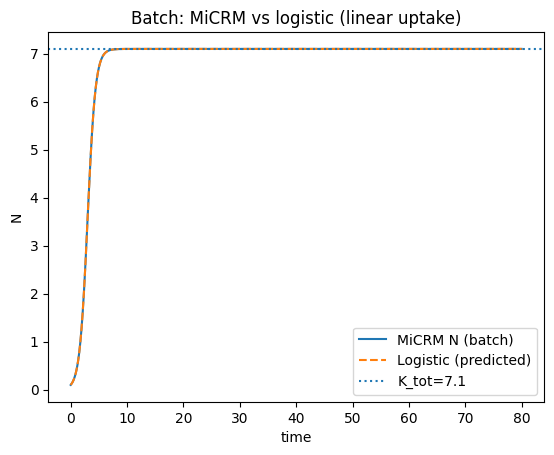

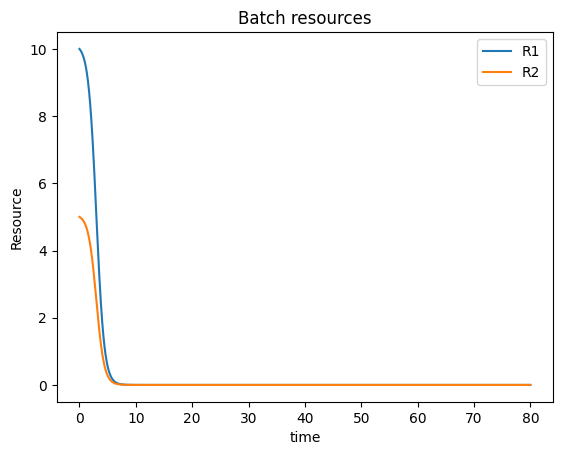

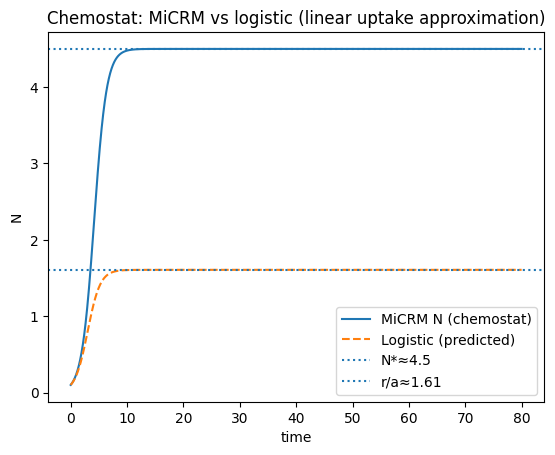

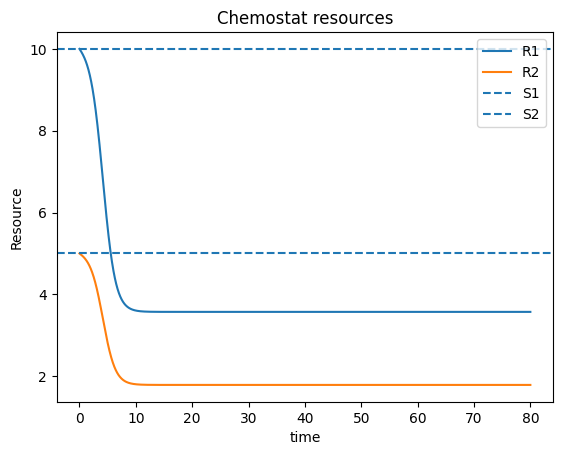

In [5]:

# Batch plots
plt.figure()
plt.plot(t_b, N_b, label="MiCRM N (batch)")
plt.plot(tL_b, Nlog_b, '--', label="Logistic (predicted)")
plt.axhline(K_tot_batch, linestyle=":", label=f"K_tot={K_tot_batch:.3g}")
plt.xlabel("time"); plt.ylabel("N"); plt.legend()
plt.title("Batch: MiCRM vs logistic (linear uptake)")
plt.show()

plt.figure()
plt.plot(t_b, Rb1, label="R1")
plt.plot(t_b, Rb2, label="R2")
plt.xlabel("time"); plt.ylabel("Resource"); plt.legend()
plt.title("Batch resources")
plt.show()

# Chemostat plots
plt.figure()
plt.plot(t_c, N_c, label="MiCRM N (chemostat)")
plt.plot(tL_c, Nlog_c, '--', label="Logistic (predicted)")
plt.axhline(np.mean(N_c[-200:]), linestyle=":", label=f"N*≈{np.mean(N_c[-200:]):.3g}")
plt.axhline(K_che, linestyle=":", label=f"r/a≈{K_che:.3g}")
plt.xlabel("time"); plt.ylabel("N"); plt.legend()
plt.title("Chemostat: MiCRM vs logistic (linear uptake approximation)")
plt.show()

plt.figure()
plt.plot(t_c, Rc1, label="R1")
plt.plot(t_c, Rc2, label="R2")
plt.axhline(S[0], linestyle="--", label="S1")
plt.axhline(S[1], linestyle="--", label="S2")
plt.xlabel("time"); plt.ylabel("Resource"); plt.legend()
plt.title("Chemostat resources")
plt.show()


## 4) Optional: Monod uptake (nonlinear), still logistic‑like

So far we used **linear (Type‑I)** uptake in resource, which makes the algebra clean.

A more biologically grounded alternative is **Monod/Michaelis–Menten** uptake ({cite:p}`monod1949growth`):

$$
u_j(R)=\lambda_j\frac{R}{K_j+R}.$$

With Monod uptake, the reduction is no longer *exactly* logistic, but early and intermediate dynamics are typically **sigmoidal** and a logistic curve can still be a useful coarse‑grained summary.

One simple effective mapping in batch is:
- $r_{\mathrm{batch}} = \sum_j \eta_j \nu_j(R_{j0})$,
- $K_{\mathrm{tot}} = N_0 + \sum_j \eta_j R_{j0}$,
- $a\approx r_{\mathrm{batch}}/K_{\mathrm{tot}}$.

This is deliberately “back‑of‑the‑envelope”: it captures the mass‑balance scale $K_{\mathrm{tot}}$ but ignores that $\nu_j$ changes as resources deplete.

For more context on Monod kinetics and chemostats, see [microbial-growth](microbial-growth).


In [6]:

Km_mod = np.array([1.0, 1.0])  # moderate half-saturation constants

p_batch_mon = Params(M=M, eta=eta, lam=lam, Km=Km_mod, D=0.0, S=np.zeros(M), use_monod=True)
p_che_mon   = Params(M=M, eta=eta, lam=lam, Km=Km_mod, D=D,  S=S,         use_monod=True)

t_bm, y_bm = simulate(p_batch_mon, N0=N0, R0=R0_batch, tmax=120)
t_cm, y_cm = simulate(p_che_mon,   N0=N0, R0=R0_che,   tmax=120)

N_bm, Rbm1, Rbm2 = y_bm
N_cm, Rcm1, Rcm2 = y_cm

# Effective batch parameters
u0_batch = uptake(R0_batch, p_batch_mon)
r_batch_eff = np.sum(eta * u0_batch)
K_tot_eff = N0 + np.sum(eta * R0_batch)
a_batch_eff = r_batch_eff / K_tot_eff

# Effective chemostat parameters at supply levels
uS = uptake(S, p_che_mon)
r_che_eff = np.sum(eta * uS) - D

# Use observed equilibrium as K-like scale for a simple effective logistic map
Nstar_obs = np.mean(N_cm[-200:])
a_che_eff = r_che_eff / Nstar_obs if Nstar_obs > 0 else np.nan

tL_bm, Nlog_bm = simulate_logistic(N0, r_batch_eff, a_batch_eff, tmax=120)
tL_cm, Nlog_cm = simulate_logistic(N0, r_che_eff, a_che_eff, tmax=120)

(r_batch_eff, a_batch_eff, K_tot_eff, r_che_eff, a_che_eff, Nstar_obs)


(np.float64(0.1575757575757576),
 np.float64(0.022193768672641917),
 np.float64(7.1),
 np.float64(-0.3424242424242424),
 np.float64(-16030622466.111002),
 np.float64(2.1360632947855447e-11))

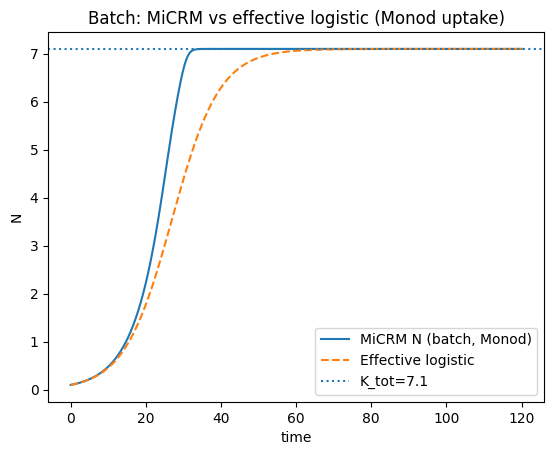

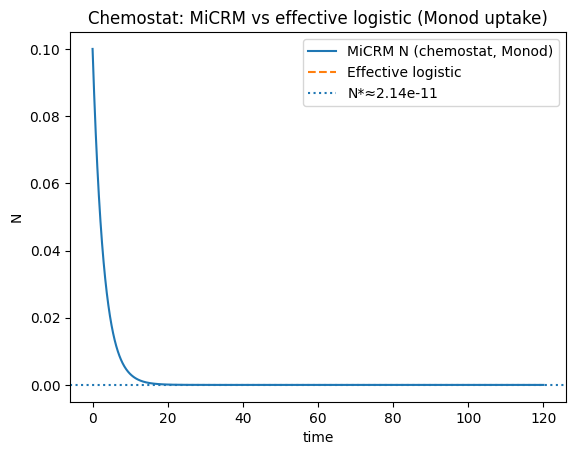

In [7]:

plt.figure()
plt.plot(t_bm, N_bm, label="MiCRM N (batch, Monod)")
plt.plot(tL_bm, Nlog_bm, '--', label="Effective logistic")
plt.axhline(K_tot_eff, linestyle=":", label=f"K_tot={K_tot_eff:.3g}")
plt.xlabel("time"); plt.ylabel("N"); plt.legend()
plt.title("Batch: MiCRM vs effective logistic (Monod uptake)")
plt.show()

plt.figure()
plt.plot(t_cm, N_cm, label="MiCRM N (chemostat, Monod)")
plt.plot(tL_cm, Nlog_cm, '--', label="Effective logistic")
plt.axhline(Nstar_obs, linestyle=":", label=f"N*≈{Nstar_obs:.3g}")
plt.xlabel("time"); plt.ylabel("N"); plt.legend()
plt.title("Chemostat: MiCRM vs effective logistic (Monod uptake)")
plt.show()


## 5) Remarks on cross-feeding (leakage)

In the full MiCRM, a fraction $l_j$ of consumed resource can be released as byproducts and redistributed via a conversion matrix. This can generate **multi‑phase growth** (e.g. diauxie) and richer community‑level assembly patterns ({cite:p}`goldford2018emergent`; {cite:p}`marsland2019available`).

A useful way to think about it:
- **Depletion** creates negative feedback (self‑limitation / competition).
- **Byproducts** can create positive feedback (facilitation), but still operate through resource accounting.

If byproducts remain within the tracked pool and are eventually utilizable by the same population, then **generalized mass balance** still constrains total biomass. In that sense, a logistic model with **effective** $(r,a)$ is often a reasonable coarse‑grained summary—even if the underlying trajectory deviates from a single smooth sigmoid.

---

## Summary of effective mappings (single species, no cross-feeding)

### Batch

- $r_{\mathrm{batch}} = \sum_j \eta_j u_j(R_{j0})$
- $K_{\mathrm{tot}} = N_0 + \sum_j \eta_j R_{j0}$
- $a_{\mathrm{batch}} \approx r_{\mathrm{batch}}/K_{\mathrm{tot}}$ (exactly $=\lambda$ for common linear uptake)

### Chemostat

- $r_{\mathrm{che}} = \sum_j \eta_j u_j(S_j) - D$
- For linear uptake $u_j=\lambda_j R$: $a_{\mathrm{che}} = \frac{1}{D}\sum_j \eta_j \lambda_j^2 S_j$
- Equilibrium satisfies $\sum_j \eta_j u_j(R_j^*)=D$ with $D(S_j-R_j^*)=u_j(R_j^*)N^*$

### Further reading

- Chemostat fundamentals: {cite:p}`novickszilard1950chemostat`
- Monod kinetics: {cite:p}`monod1949growth`
- MiCRM / energy-flux consumer–resource framing: {cite:p}`marsland2019available`
